### Regresión Polinómica: Explicación Matemática y Aplicaciones

La regresión polinómica es una forma de regresión lineal en la que la relación entre la variable independiente $x$ y la variable dependiente $y$ se modela como un polinomio de grado $n$. A diferencia de la regresión lineal simple (RLS) y la regresión lineal múltiple (RLM), que modelan la relación como lineal o lineal en múltiples variables, la regresión polinómica captura relaciones no lineales entre las variables.

#### Formulación Matemática

Supongamos que queremos ajustar un polinomio de grado $n$ a los datos. El modelo se puede escribir como:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon
$$

Aquí, $\beta_0, \beta_1, \dots, \beta_n$ son los coeficientes del polinomio y $\epsilon$ es el término de error, que asumimos que sigue una distribución normal con media cero.

#### Uso de la Regresión Polinómica

La regresión polinómica es útil en escenarios donde la relación entre las variables no es simplemente lineal, permitiendo un ajuste más flexible a los datos. Es particularmente útil para fenómenos físicos donde las tasas de cambio aumentan o disminuyen de manera no lineal.

#### Implementación en Python sin Librerías

Aquí te muestro cómo puedes implementar una regresión polinómica manualmente sin usar librerías específicas para la regresión polinómica:

```python
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 10, 15])

# Crear matriz de diseño para un polinomio de grado 2
X = np.vstack([np.ones(len(x)), x, x**2]).T

# Calcular coeficientes usando la ecuación normal
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Generar predicciones
x_new = np.linspace(1, 5, 100)
X_new = np.vstack([np.ones(len(x_new)), x_new, x_new**2]).T
y_pred = X_new @ beta

# Visualizar los resultados
plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x_new, y_pred, label='Ajuste polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
```

### Implementación en Python Usando Scikit-Learn

Para una implementación más sencilla y robusta, podemos usar la librería scikit-learn que proporciona herramientas específicas para la regresión polinómica:

``` python

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transformar datos
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Regresión lineal
model = LinearRegression()
model.fit(X_poly, y)

# Predecir y graficar
x_new = np.linspace(1, 5, 100).reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = model.predict(x_new_poly)

plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x_new, y_new, label='Ajuste polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
```
### Pruebas para Validar el Modelo de Regresión Polinómica

Para asegurarnos de que nuestro modelo de regresión polinómica es robusto y generalizable, debemos realizar una serie de pruebas y evaluaciones. Estas incluyen el análisis de residuos, la validación cruzada y el cálculo de métricas de ajuste como el R-cuadrado y el R-cuadrado ajustado.

#### 3. Validación Cruzada

La validación cruzada es crucial para evitar el sobreajuste, especialmente en modelos polinómicos de alto grado. Este método implica dividir el conjunto de datos en varias partes (folds), entrenar el modelo en algunas de ellas y validar en las restantes, y luego rotar estas partes para que todas sirvan como entrenamiento y validación. Esto asegura que el modelo generaliza bien a nuevos datos.

#### 4. R-cuadrado y R-cuadrado Ajustado

Estas métricas ayudan a evaluar cuánta variabilidad en los datos es explicada por el modelo. El R-cuadrado ajustado es particularmente útil en la regresión polinómica, ya que penaliza los grados adicionales que no aportan significativamente al modelo.

### Código para Pruebas y Evaluación en Python

A continuación, se presenta el código necesario para realizar estas pruebas utilizando la librería scikit-learn, que proporciona herramientas para calcular el R-cuadrado, realizar validación cruzada y analizar los residuos.

R-cuadrado: 0.9954545454545455
Validación cruzada (R-cuadrado): [nan nan nan nan nan]
Media R-cuadrado: nan


c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\l

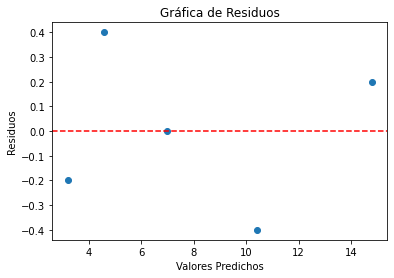

In [1]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 10, 15])

# Transformar datos para polinomio de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, y)

# Calcular R-cuadrado
r2 = r2_score(y, model.predict(X_poly))
print("R-cuadrado:", r2)

# Realizar validación cruzada
scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
print("Validación cruzada (R-cuadrado):", scores)
print("Media R-cuadrado:", np.mean(scores))

# Analizar residuos
residuos = y - model.predict(X_poly)
plt.figure()
plt.scatter(model.predict(X_poly), residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfica de Residuos')
plt.show()